In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.power import TTestIndPower, TTestPower

In [2]:
observed = 0.55 #observed prbability of getting heads in a coin flip
expected = 0.5
prob = expected
rows = []
for n in [10,20,50,500]:
    std = np.sqrt(n*prob*(1-prob))# std of binomial distribution of the  sqrt of (n*P*(1-p))
    cohens_d = ((n*observed)-(n*expected))/std
    rows.append({"effect_size":cohens_d,'sample size':n})

data = pd.DataFrame(rows)
data.head()

,effect_size,sample size
0,0.316228,10
1,0.447214,20
2,0.707107,50
3,2.236068,500


In [3]:
dict_rows = {}
for n in [10,20,50,500]:
    temp_dict = {}#temp dictionary
    for observed in [.51,.55,.6,.65,.7,.75,.8,.85,.9]:
        std = np.sqrt(n*prob*(1-prob))
        d = (observed*n-expected*n)/std
        temp_dict[observed]=d
        dict_rows[n]=temp_dict
print('hypothetical effect sizes for various alternative hypotheses')
df=pd.DataFrame.from_dict(dict_rows,orient='index')
df.head()

    


hypothetical effect sizes for various alternative hypotheses


,0.51,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90
10,0.063246,0.316228,0.632456,0.948683,1.264911,1.581139,1.897367,2.213594,2.529822
20,0.089443,0.447214,0.894427,1.341641,1.788854,2.236068,2.683282,3.130495,3.577709
50,0.141421,0.707107,1.414214,2.121320,2.828427,3.535534,4.242641,4.949747,5.656854
500,0.447214,2.236068,4.472136,6.708204,8.944272,11.180340,13.416408,15.652476,17.888544


<function matplotlib.pyplot.show(close=None, block=None)>

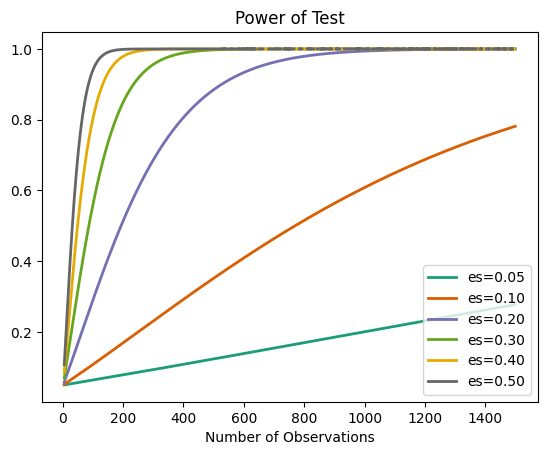

In [4]:
power_analysis = TTestIndPower()
power_analysis.plot_power(dep_var='nobs',
                          nobs = np.array(range(5,1500)),
                          effect_size=np.array([.05,.1,.2,.3,.4,.5]),
                          alpha = 0.05)
plt.show